To run the notebook make sure to install ipykernel in the environment: <br />
conda install ipykernel <br />
ipython kernel install --user --name=stellar

In [1]:
import argparse
from utils import prepare_save_dir
from STELLAR import STELLAR
import numpy as np
import torch
import pandas as pd
import anndata
import scanpy as sc
import pickle
import sys
sys.path.append("../")
from datasets import GraphDataset, load_tonsilbe_data, load_hubmap_data

In [2]:
print(torch.__version__)

2.4.1


The notebook contains demo of running downsampled Tonsil/Barrett’s esophagus CODEX dataset where tonsil dataset is used as annotated dataset and Barrett’s esophagus dataset as unannotated dataset. The demo shows an example on a downsampled dataset constructed using 50% cells of the original dataset. The distance threshold for graph construction is dataset specific and here we set it to 50 as in the paper (see Fig 2h for performance with different threshold values). Datasets for running demo example can be found on [dryad](https://datadryad.org/stash/share/1OQtxew0Unh3iAdP-ELew-ctwuPTBz6Oy8uuyxqliZk). 

### Setting default parameters

In [3]:
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='TonsilBE', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=50)
parser.add_argument('--lr', type=float, default=1e-3) # learning rate
parser.add_argument('--wd', type=float, default=5e-2) # weight decay
parser.add_argument('--num-heads', type=int, default=13)
parser.add_argument('--num-seed-class', type=int, default=3)
parser.add_argument('--sample-rate', type=float, default=0.5) # downsample dataset by using 50% of cells
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N', help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)# distance threshold for constructing the graph
parser.add_argument('--savedir', type=str, default='./') # output directory

_StoreAction(option_strings=['--savedir'], dest='savedir', nargs=None, const=None, default='./', type=<class 'str'>, choices=None, required=False, help=None, metavar=None)

In [4]:
parser.add_argument('--use-processed-graph', type=bool, default=False) # whether to use already preprocessed graph or construct the graph 

_StoreAction(option_strings=['--use-processed-graph'], dest='use_processed_graph', nargs=None, const=None, default=False, type=<class 'bool'>, choices=None, required=False, help=None, metavar=None)

In [5]:
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [6]:
print(args.device)

cuda


STELLAR expects graph as input. This code either loads already constructed graph from TonsilBE_processed_0.5.pkl resulting in lower running time, or also runs graph construction part:

In [7]:
if args.use_processed_graph:
    labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = pickle.load(open( "./data/TonsilBE_processed_0.5.pkl", "rb" ) )
else:
    labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges, inverse_dict = load_tonsilbe_data('./data/BE_Tonsil_l3_dryad.csv', args.distance_thres, args.sample_rate)
dataset = GraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

### Training STELLAR

In [8]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

/u/yashjain/anaconda3/envs/stellar-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/u/yashjain/anaconda3/envs/stellar-env/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.ClusterData' is deprecated, use 'loader.ClusterData' instead
  warnings.warn(out)
Computing METIS partitioning...
Done!
/u/yashjain/anaconda3/envs/stellar-env/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.ClusterLoader' is deprecated, use 'loader.ClusterLoader' instead
  warnings.warn(out)


Loss: 2.084474


Computing METIS partitioning...
Done!


Loss: 1.286213


Computing METIS partitioning...
Done!


Loss: 0.902039


Computing METIS partitioning...
Done!


Loss: 0.689723


Computing METIS partitioning...
Done!


Loss: 0.566441


Computing METIS partitioning...
Done!


Loss: 0.494361


Computing METIS partitioning...
Done!


Loss: 0.452661


Computing METIS partitioning...
Done!


Loss: 0.431763


Computing METIS partitioning...
Done!


Loss: 0.421671


Computing METIS partitioning...
Done!


Loss: 0.414673


Computing METIS partitioning...
Done!


Loss: 0.411981


Computing METIS partitioning...
Done!


Loss: 0.409455


Computing METIS partitioning...
Done!


Loss: 0.410717


Computing METIS partitioning...
Done!


Loss: 0.409312


Computing METIS partitioning...
Done!


Loss: 0.409243


Computing METIS partitioning...
Done!


Loss: 0.408926


Computing METIS partitioning...
Done!


Loss: 0.413633


Computing METIS partitioning...
Done!


Loss: 0.408253


Computing METIS partitioning...
Done!


Loss: 0.408674


Computing METIS partitioning...
Done!


Loss: 0.412527


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.096094


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.410364


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.040312


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.002514


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.013034


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.018663


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.032315


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.033027


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.078465


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.069420


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.077296


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.088673


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.104869


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.080782


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.071591


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.084677


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.102403


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.111445


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.117504


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.128449


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.134728


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.105115


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.123207


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.120481


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.139539


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.145084


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.127729


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.130115


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.151693


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.123227


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.149869


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.144352


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.147977


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.152622


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.127666


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.150035


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.146217


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.143384


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.144720


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.152819


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.150660


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.154514


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.157121


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.157793


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.151970


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.125513


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.151114


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.135046


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.154180


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.152127


### Visualizing results

Cells are colored according to predicted cell types. Novel classes are denoted with numbers.

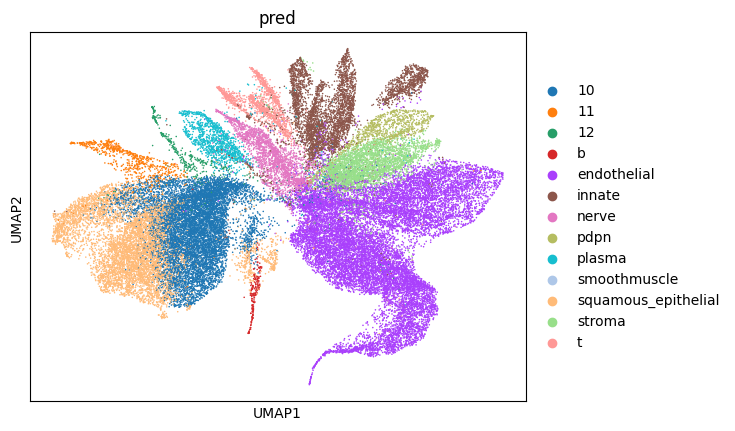

In [9]:
adata = anndata.AnnData(unlabeled_X)
results = results.astype('object')
for i in range(len(results)):
    if results[i] in inverse_dict.keys():
        results[i] = inverse_dict[results[i]]
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)